<a href="https://colab.research.google.com/github/Oughty-Otieno/Data-Visualisation-with-Seaborn/blob/main/_Data_Visualisation_with_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AfterWork Data Science: Data Visualisation with Seaborn


## 1. Business Understanding




As a data analyst working with Quick Mart chain of supermarkets, the task is to create an analysis report, complete with recommendations to guide the management team on a marketing strategy decision.

The report should include:
- Which product categories performed best.
- Which branches had the highest sales and profits
- What key trends in sales in each branch are noticeable over the time.
- The average amount spent by customers for each branch.
The average rating for each branch.

## 2. Data Exploration

In [1]:
# Loading libraries
# ---
# 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
 

In [2]:
# Loading the dataset
# --- 
# Dataset url = https://bit.ly/SupermarketsDS
# --- 
# YOUR CODE GOES HERE
df = pd.read_csv("https://bit.ly/SupermarketsDS")

In [3]:
# Determining the size 
# ---
# YOUR CODE GOES HERE

df.shape

(1000, 17)

In [4]:
# Checking the datatypes
# ---
# YOUR CODE GOES HERE

df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [5]:
# Statistical summary
# ---
# YOUR CODE GOES HERE

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


## 3. Data Cleaning

In [6]:
# Checking for duplicates 
# ---
# YOUR CODE GOES HERE

df.duplicated().sum()

0

In [7]:
# Checking for missing values 
# ---
# YOUR CODE GOES HERE

df.isnull().any().sum()

0

In [8]:
# Dropping irrelevant columns
# ---
# YOUR CODE GOES HERE

to_be_dropped = ['Invoice ID', 'cogs']
df.drop(to_be_dropped,  axis =1, inplace=True)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,4.761905,30.2085,5.3


## 4. Data analysis and visualisation (Using Seaborn for visualisation)

We investigate the questions listed above in order to craft a fact-driven recommendation.

### 4.a) Questions

In [59]:
# Question 1 - Which product categories(Product_line) performed best.
# YOUR CODE GOES HERE
df_new  = df.groupby('Product line').sum().sort_values(by = 'Total', ascending = False)
df_new = df_new.reset_index()

In [60]:
df_new.head()

,Product line,Unit price,Quantity,Tax 5%,Total,gross margin percentage,gross income,Rating
0,Food and beverages,9745.54,952,2673.5640,56144.8440,828.571429,2673.5640,1237.7
1,Sports and travel,9460.88,920,2624.8965,55122.8265,790.476190,2624.8965,1148.1
2,Electronic accessories,9103.77,971,2587.5015,54337.5315,809.523810,2587.5015,1177.2
3,Fashion accessories,10173.35,902,2585.9950,54305.8950,847.619048,2585.9950,1251.2
4,Home and lifestyle,8850.71,911,2564.8530,53861.9130,761.904762,2564.8530,1094.0


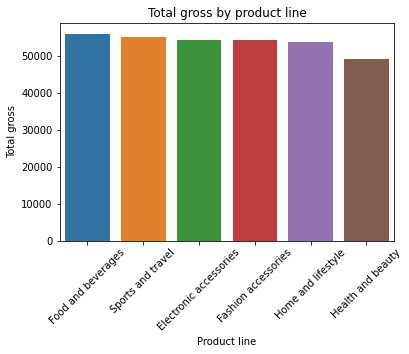

In [62]:
# Prepare
# Render vertical bar chart
sns.barplot(data = df_new, x = df_new['Product line'], y = df_new['Total'])

# # Tweak and Label  
plt.xticks(rotation = 45)
plt.ylabel('Total gross')
plt.title('Total gross by product line')

# Display
plt.show()


In [65]:
# Question 2: Which branches had the highest sales and profits ?
# YOUR CODE GOES HERE
df.head()
df_new = df.groupby('Branch').sum().sort_values(by = 'Total', ascending = False)
df_new = df_new.reset_index()
df_new.head()

,Branch,Unit price,Quantity,Tax 5%,Total,gross margin percentage,gross income,Rating
0,C,18567.76,1831,5265.1765,110568.7065,1561.904762,5265.1765,2319.9
1,A,18625.49,1859,5057.1605,106200.3705,1619.047619,5057.1605,2389.2
2,B,18478.88,1820,5057.0320,106197.6720,1580.952381,5057.0320,2263.6


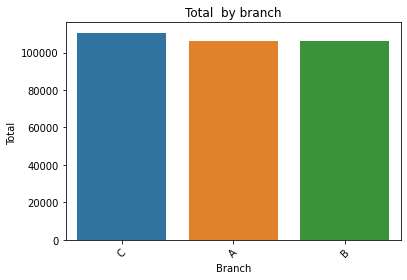

In [66]:

sns.barplot(data = df_new, x = df_new['Branch'], y = df_new['Total'])

# # Tweak and Label  
plt.xticks(rotation = 45)
plt.ylabel('Total ')
plt.title('Total  by branch')

# Display
plt.show()


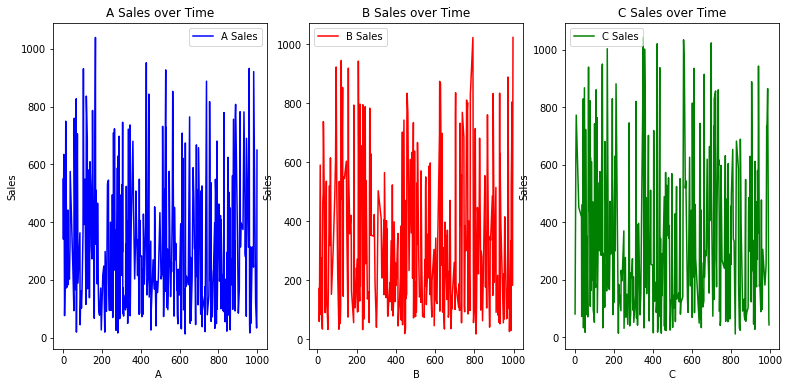

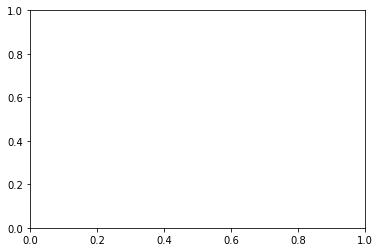

In [82]:
# Question 3: What key trends in sales in each branch are noticeable over the time.

# Get figure and axes objects, defining (1 rows, 3 column)
fig, ax = plt.subplots(1, 3, figsize=(13, 6)) 

# Creating a second dataset for comparison
df_A = df.Total[df['Branch'] =='A']
df_B = df.Total[df['Branch'] =='B']
df_C = df.Total[df['Branch'] =='C']

# Get figure and axes objects 
fig, axs = plt.subplots() 

# Render the plots 
ax1 = sns.lineplot(data = df_A, color="blue", label="A Sales", ax = ax[0])
ax2 = sns.lineplot(data = df_B, color="red", label="B Sales", ax = ax[1])
ax3 = sns.lineplot(data = df_C, color="green", label="C Sales", ax = ax[2])

# Add a title
ax1.set_title('A Sales over Time')
ax2.set_title('B Sales over Time')
ax3.set_title('C Sales over Time')

# Add an x-axis label 
ax1.set_xlabel('A ')
ax2.set_xlabel('B')
ax3.set_xlabel('C')

# Add a y-axis label 
ax1.set_ylabel('Sales')
ax2.set_ylabel('Sales')
ax3.set_ylabel('Sales')

# Display the plot
plt.show()

In [83]:
# Question 4(a): The average amount spent by customers for each branch.
# YOUR CODE GOES HERE
df_new = df.groupby('Branch').mean().sort_values(by = 'Total', ascending = False)
df_new = df_new.reset_index()
df_new.head()

,Branch,Unit price,Quantity,Tax 5%,Total,gross margin percentage,gross income,Rating
0,C,56.609024,5.582317,16.052367,337.099715,4.761905,16.052367,7.072866
1,B,55.659277,5.481928,15.232024,319.872506,4.761905,15.232024,6.818072
2,A,54.780853,5.467647,14.874001,312.354031,4.761905,14.874001,7.027059


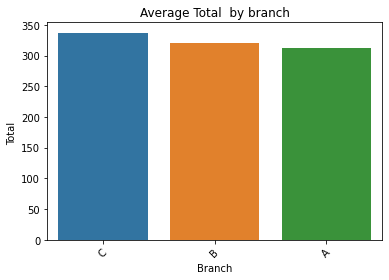

In [84]:
sns.barplot(data = df_new, x = df_new['Branch'], y = df_new['Total'])

# # Tweak and Label  
plt.xticks(rotation = 45)
plt.ylabel('Total ')
plt.title('Average Total  by branch')

# Display
plt.show()

In [85]:
# Question 4(b):The average rating for each branch.
# YOUR CODE GOES HERE

df_new= df.groupby('Branch').mean().sort_values(by = 'Total', ascending = False)

df_new = df_new.reset_index()
df_new.head()

,Branch,Unit price,Quantity,Tax 5%,Total,gross margin percentage,gross income,Rating
0,C,56.609024,5.582317,16.052367,337.099715,4.761905,16.052367,7.072866
1,B,55.659277,5.481928,15.232024,319.872506,4.761905,15.232024,6.818072
2,A,54.780853,5.467647,14.874001,312.354031,4.761905,14.874001,7.027059


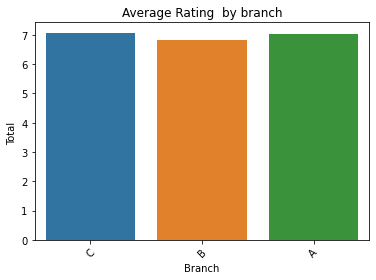

In [86]:
sns.barplot(data = df_new, x = df_new['Branch'], y = df_new['Rating'])

# # Tweak and Label  
plt.xticks(rotation = 45)
plt.ylabel('Total ')
plt.title('Average Rating  by branch')

# Display
plt.show()

## 5. Summary of findings

What observations did you make from your analysis?

1. We have managed to identify the category that performed the best, from our bar plot (Foods and bevarages).
2. We have managed to identify the branches that made most profits (Branch C)
3. We have seen the trend over time of sales in each of the branches
4. We have also seen the average amount spent by customers for each branch and  the average rating for each branch.


## 6. Recommendations

What recommendations can you make from your analysis/observations?

From the analysis, having seen the performace of each product categories, efforts to improve the categories perfoming below the rest can be taken.

More investigation can be done to get the root cause on why branches A and B have lower sales.
